In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [31]:
np.random.seed(22)
means = [[0, 5], [5, 0]]
cov0 = [[4, 3], [3, 4]]
cov1 = [[3, 1], [1, 1]]
N0 = 50
N1 = 40
N = N0 + N1
X0 = np.random.multivariate_normal(means[0], cov0, N0) # each row is a data point 
X1 = np.random.multivariate_normal(means[1], cov1, N1)

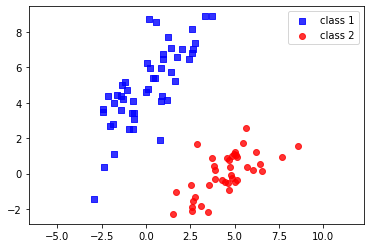

In [32]:
# display
# with PdfPages('data.pdf') as pdf:
plt.scatter(X0[:, 0], X0[:, 1], color='blue', marker='s', alpha=.8,
            label='class 1')
plt.scatter(X1[:, 0], X1[:, 1], color='red', marker='o', alpha=.8,
            label='class 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)

# hide ticks
cur_axes = plt.gca()
# cur_axes.axes.get_xaxis().set_ticks([])
# cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim([0, 1])
plt.ylim([-10, 10])
plt.axis('equal')

# pdf.savefig()
plt.show()


In [33]:
# build S_B
m0 = np.mean(X0.T, axis=1, keepdims=True)
m1 = np.mean(X1.T, axis=1, keepdims=True)

a = m0 - m1
S_B = a.dot(a.T)

# build S_W
A = X0.T - np.tile(m0, (1, N0))
B = X1.T - np.tile(m1, (1, N1))

S_W = A.dot(A.T) + B.dot(B.T)

In [34]:
_, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
w = W[:, 0]
print('w = ', w)

w =  [ 0.75091074 -0.66040371]


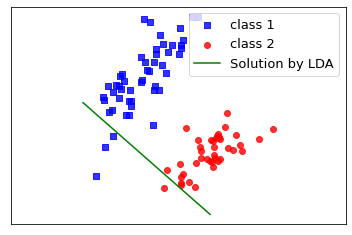

In [35]:
# with PdfPages('res.pdf') as pdf:
plt.scatter(X0[:, 0], X0[:, 1], color='blue', marker = 's', alpha=.8, 
            label='class 1')
plt.scatter(X1[:, 0], X1[:, 1], color='red', marker = 'o', alpha=.8, 
            label='class 2')

# plt.legend(loc = "best", fontsize = 17)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim([0, 1])
plt.ylim([-10, 10])
plt.axis('equal')
# plt.arrow(5*w[0],5*w[1],-10*w[0],-10*w[1], shape='full', lw=1, length_includes_head=True, head_width=.31)
plt.plot([-5*w[0], 6*w[0]], [-5*w[1], 6*w[1]], 'g', label = 'Solution by LDA')

plt.legend(loc='best', shadow=False, scatterpoints=1, fontsize = 13)
# pdf.savefig()
plt.show()

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.concatenate((X0, X1))
y = np.array([0]*N0 + [1]*N1)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print('w_sklearn = ', clf.coef_[0]/np.linalg.norm(clf.coef_)) # normalize

w_sklearn =  [ 0.75091074 -0.66040371]


## Iris

In [37]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=100)

# dimensionality reduction by LDA
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print('Acc = %f/%f' %())
print("LDA classifier %.2f" % (100*accuracy_score(y_test, y_pred)))

# Train a kernel SVM on projected data by LDA
X_train_new = clf.transform(X_train)
X_test_new = clf.transform(X_test)

svm1 = svm.SVC(kernel='linear', gamma=1)
svm1.fit(X_train_new, y_train)
y_pred1 = svm1.predict(X_test_new)

print("LDA + SVM accuracy: %.2f %%" % (100*accuracy_score(y_test, y_pred1)))

# Train a kernel SVM on projected data by PCA
pca = PCA(n_components=2)  # K = 100
pca.fit(X_train)
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

svm1 = svm.SVC(kernel='linear', gamma=1)
svm1.fit(X_train_new, y_train)
y_pred2 = svm1.predict(X_test_new)

print("PCA + SVM accuracy: %.2f %%" % (100*accuracy_score(y_test, y_pred2)))


LDA classifier 95.00
LDA + SVM accuracy: 96.00 %
PCA + SVM accuracy: 95.00 %


## MNIST

In [39]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
# https://pypi.python.org/pypi/python-mnist/

# you need to download the MNIST dataset first
# # at: http://yann.lecun.com/exdb/mnist/
# mndata = MNIST('../MNIST/') # path to your MNIST folder 
# mndata.load_testing()
# mndata.load_training()
# X = mndata.test_images
# # X_train = mndata.train_images
# y = np.asarray(mndata.test_labels)
# # y_train = np.asarray(mndata.train_labels)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', data_home='E:\AIWorkplace\MLCB\lda\data')
X = mnist.data 
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=1000)